In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(f"{X_train.shape=}\n{y_train.shape=}\n{X_test.shape=}\n{y_test.shape=}")

X_train.shape=(60000, 28, 28)
y_train.shape=(60000,)
X_test.shape=(10000, 28, 28)
y_test.shape=(10000,)


In [4]:
X_train = X_train / 255.
X_test  = X_test  / 255.
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = encoder.transform(y_test.reshape(-1, 1)).toarray()

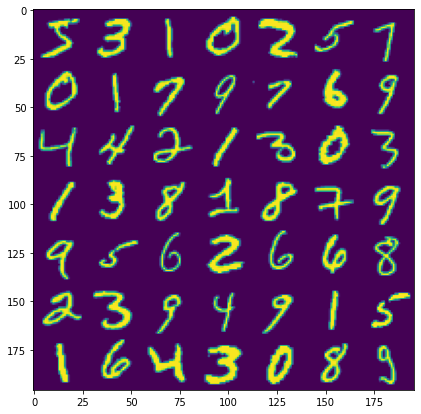

In [5]:
fig, ax = plt.subplots(figsize=(7, 7))
X_to_plot = X_train[:49, :]
X_to_plot = np.c_[X_to_plot[  : 7, ...].reshape(28*7, 28),
                  X_to_plot[ 7:14, ...].reshape(28*7, 28),
                  X_to_plot[14:21, ...].reshape(28*7, 28),
                  X_to_plot[21:28, ...].reshape(28*7, 28),
                  X_to_plot[28:35, ...].reshape(28*7, 28),
                  X_to_plot[35:42, ...].reshape(28*7, 28),
                  X_to_plot[42:49, ...].reshape(28*7, 28)]
ax.imshow(X_to_plot)

In [7]:
X_train, X_test = X_train.reshape(60000, 28, 28, 1), X_test.reshape(10000, 28, 28, 1)

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(filters=16, kernel_size=(3, 3),
                 padding="valid"))                  # shape  : (16, 26, 26)
model.add(MaxPooling2D(pool_size=(2, 2), strides=2,
                       padding="valid"))            # shape  : (16, 13, 13)
model.add(Conv2D(filters=32, kernel_size=(5, 5),
                 padding="valid"))                  # shape  : (32, 9, 9)
model.add(Conv2D(filters=64, kernel_size=(5, 5),
                 padding="valid"))                  # shape  : (64, 5, 5)
model.add(Conv2D(filters=128, kernel_size=(5, 5),
                 padding="valid"))                  # shape  : (128, 1, 1)
model.add(Flatten())                                # shape  : (128, )
model.add(Dense(units=32, activation="relu"))       # shape  : (32, )
model.add(Dense(units=10, activation="softmax"))    # output : (10, )

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 45s 23ms/step - loss: 0.3437 - accuracy: 0.8933 - val_loss: 0.1242 - val_accuracy: 0.9606
Epoch 2/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1137 - accuracy: 0.9650 - val_loss: 0.0938 - val_accuracy: 0.9697
Epoch 3/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0958 - accuracy: 0.9716 - val_loss: 0.0862 - val_accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0762 - accuracy: 0.9771 - val_loss: 0.0833 - val_accuracy: 0.9733
Epoch 5/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0787 - accuracy: 0.9765 - val_loss: 0.1178 - val_accuracy: 0.9651


In [12]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)

79/79 [==============================] - 1s 18ms/step - loss: 0.1178 - accuracy: 0.9651


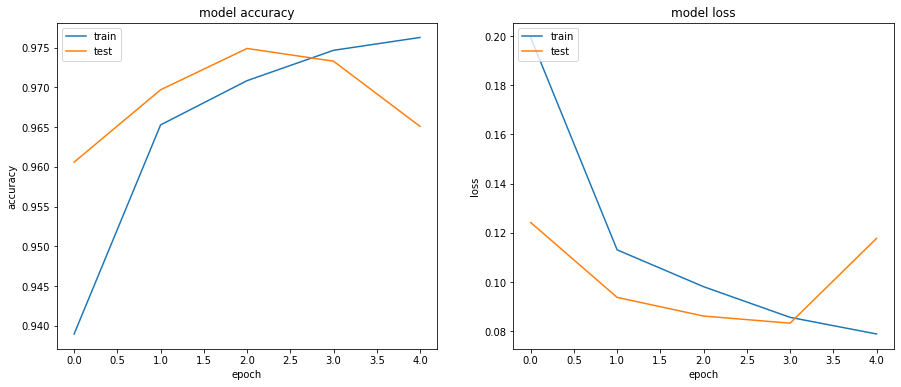

In [13]:
# summarize history for accuracy
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax[0].plot(history.history['accuracy']);
ax[0].plot(history.history['val_accuracy']);
ax[0].set_title('model accuracy');
ax[0].set_ylabel('accuracy');
ax[0].set_xlabel('epoch');
ax[0].legend(['train', 'test'], loc='upper left');
# summarize history for loss
ax[1].plot(history.history['loss']);
ax[1].plot(history.history['val_loss']);
ax[1].set_title('model loss');
ax[1].set_ylabel('loss');
ax[1].set_xlabel('epoch');
ax[1].legend(['train', 'test'], loc='upper left');

In [14]:
from sklearn.metrics import roc_curve, auc

In [15]:
y_preds = model.predict(X_test)

In [16]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

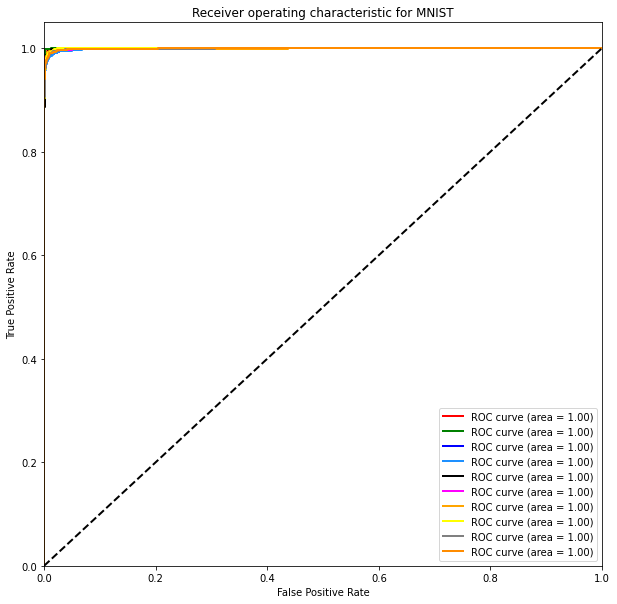

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
lw = 2

colors = [
    "red", "green", "blue", "dodgerblue", "black",
    "magenta", "orange", "yellow", "gray", "darkorange"
]

for i in range(10):
    ax.plot(fpr[i], tpr[i], color=colors[i],
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i]);
ax.plot([0, 1], [0, 1], color="black", lw=lw, linestyle='--');
ax.set_xlim([0.0, 1.0]);
ax.set_ylim([0.0, 1.05]);
ax.set_xlabel('False Positive Rate');
ax.set_ylabel('True Positive Rate');
ax.set_title('Receiver operating characteristic for MNIST');
ax.legend();